# **Pengenalan Matplotlib dan Persiapan Dataset**

Pada bagian ini akan dibahas pengenalan matplotlib dan persiapan dataset.



Dalam menganalisa data, sering kali digunakan visualisasi data untuk memahami karakteristik maupun trend di dalam data yang dimiliki. 

Salah satu library di python yang biasa digunakan untuk keperluan visualisasi data adalah matplotlib.


Pada bagian ini akan dijelaskan beberapa hal yang dapat dilakukan dengan matplotlib. Di antaranya:

- Pengolahan dataset (menggunakan library NumPy & Pandas).
- Membuat grafik dasar menggunakan matplotlib.
- Melakukan modifikasi komponen visualisasi, seperti axis, labels, title, dan legend.
- Menyimpan plot visualisasi yang sudah dibuat

## **Pengenalan Dataset**

Hal yang pertama yang dilakukan adalah membaca file raw data penjualan dari store dqlab.

Datanya ada di file 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv' 

In [1]:
# # Mount dengan Google Drive dan lanjutkan dengan 
# # mengatur working directory
# %cd /content/drive/MyDrive/DQLAB/Data Visualization


In [2]:
# # Mengecek working directory
# % pwd

In [3]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wget
from datetime import datetime

In [4]:
# # Download file yang dibutuhkan
# # Jika sudah pernah didownload, lewati langkah ini

# wget.download('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

In [5]:
dataset = pd.read_csv('retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
dataset.head()

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


## **Penjelasan Dataset**

Berikut ini tampilan data transaksi supermarket sepanjang tahun 2019, lengkap dengan masing-masing penjelasannya untuk tiap kolom. 

- order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa - - produk, tetapi hanya dilakukan oleh 1 customer
- order_date : tanggal terjadinya transaksi
- customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
- city : kota tempat toko terjadinya transaksi
- province : provinsi (berdasarkan city)
- poduct_id : ID dari suatu product yang dibeli
- brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
- quantity : Kuantitas / banyaknya product yang dibeli
- item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli


Untuk mendapatkan informasi yang lebih jelas dapat diperoleh dengan method `.info()`:

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


Dengan dataset yang tersedia, direncakan akan dibuat sebuah grafik GMV bulanan berupa sebuah line chart dengan sumbu-x berupa bulan, dan sumbu-y adalah total GMV di bulan tersebut. **GMV** adalah singkatan dari **Gross Merchandise Value** atau total uang yang dibayarkan customer. 

Untuk melakukannya, tentu diperlukan kolom yang berisi bulan, dan GMV yang mana belum tersedia pada dataset yang ada. Untuk itu maka perlu dilakukan *fiture engineering*. Langkah pertama yang dapat dilakukan adalah menambahkan kolom **order_month** pada dataset.

## **Menambahkan kolom order_month**

In [7]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


Ada beberapa function yang berperan di sini:

- `apply` & `lambda` biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal `.apply(lambda x: x*2)` berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
- Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
- Function  strftime digunakan untuk mengubah format suatu data bertime datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti outputnya adalah waktu dengan bentuk **YYYY-MM** atau tahun dan bulan saja, tanggalnya sudah tidak ada. 
 

## **Menambahkan kolom GMV**

Selanjutnya, bagaimana dengan GMV? Definisikan **GMV** adalah perkalian setiap entri di kolom **item_price** dan kolom **quantity**. Bisa saja menggunakan fungsi `apply` & `lambda`, namun cara yang lebih mudah adalah dengan mengalikan kedua kolom yang disebutkan secara langsung.

In [8]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
dataset.head()

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


Sekarang isi dataframe menjadi seperti ini, sudah ada kolom **order_month** dan **gmv**.

## **Membuat Data Agregat**

Sebelum membuat chart, data **gmv** perlu ditampilkan dalam bentuk agregat berdasarkan **order_month**.

In [9]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


## **Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV**

Selanjutnya akan digunakan library **matplotlib** untuk visualisi datanya. Cara standar untuk menggunakan matplotlib yaitu dengan memanggil function plt.plot lalu definisikan nilai di sumbu-x dan sumbu-y. Dalam hal ini, definisikan kolom order_month di sumbu-x (parameter pertama), dan kolom gmv di sumbu-y (parameter kedua). Setelah selesai mendefinisikan komponen chart-nya, lalu panggil plt.show()untuk menampilkan grafiknya.

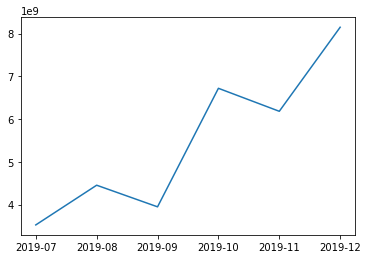

In [10]:
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'] )
plt.show()

## **Cara Alternatif: Fungsi .plot() pada pandas Dataframe**

Dengan pendekatan lain, dimungkinkan juga melakukan visualisasi dengan matplotlib tanpa membuat variabel baru.

Misalnya dengan code seperti ini:

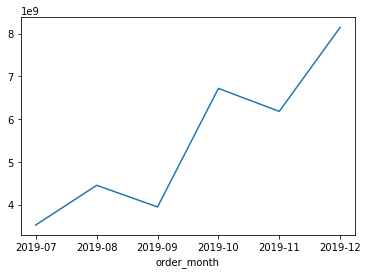

In [11]:
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

# **Kustomisasi Grafik - Part 1**

## **Anatomi dari Figure**

Sebelum mulai kustomisasi, ada baiknya kita pahami dulu anatomi dari sebuah Figure di maplotlib. Bisa dilihat sesuai di gambar berikut
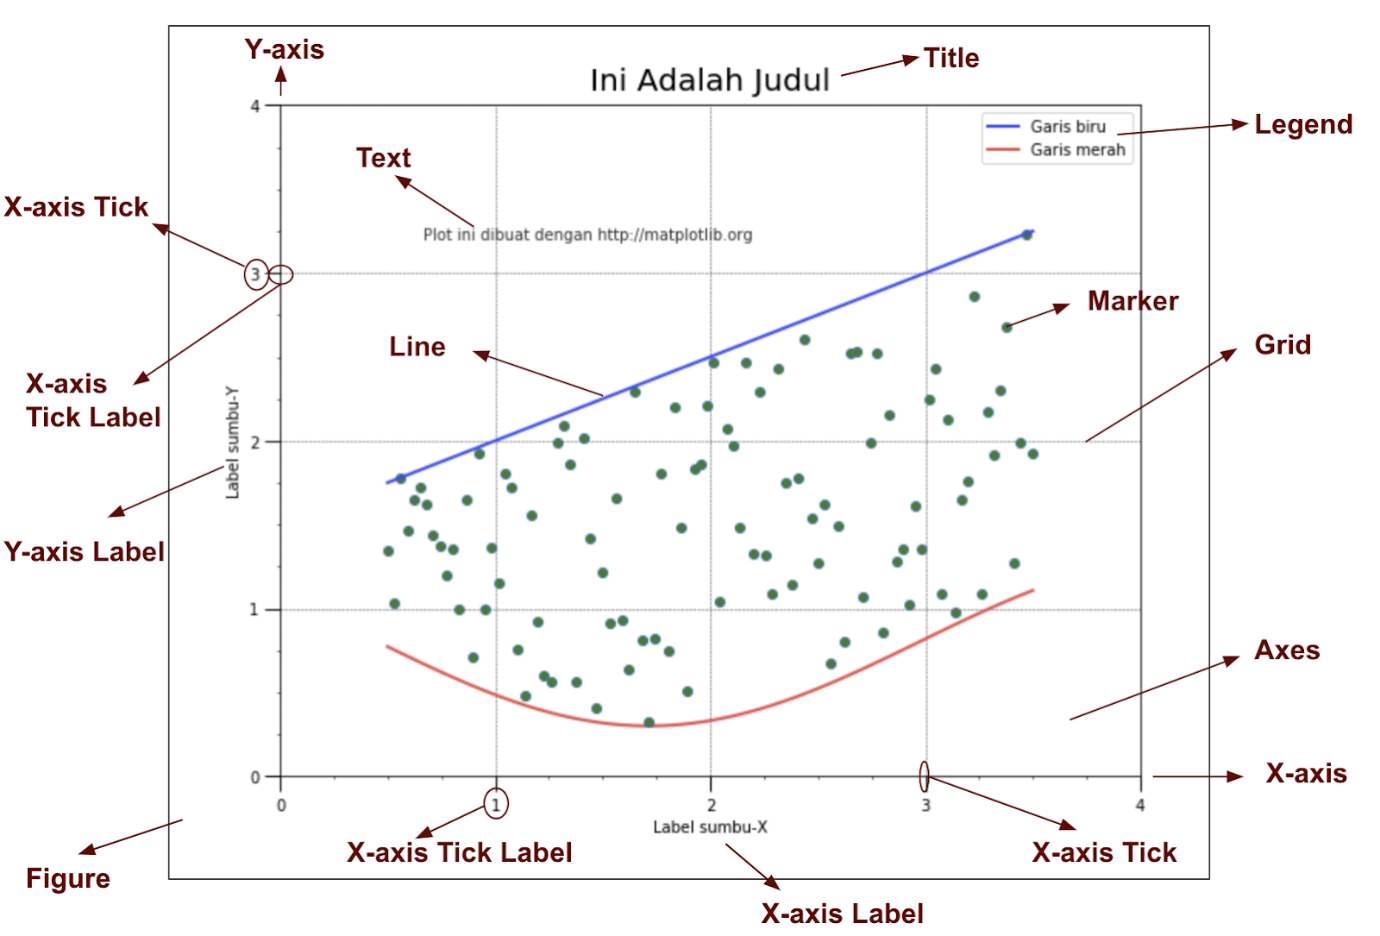

Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.

- Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
- Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. 
- Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). Masing-masing sumbu memiliki komponen sebagai berikut:
  * Axis Label: Nama dari sumbu yang ditampilkan.
  * Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
  * Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
- Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot / histogram).
- Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.
 

Memahami komponen-komponen di atas sudah cukup untuk melakukan berbagai visualisasi dengan matplotlib. Untuk anatomi yang lebih lengkap, bisa dilihat di link berikut: https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html.

## **Mengubah Ukuran Figure**

Dalam contoh ini, ukuran Figure telah diubah agar memiliki panjang 15 inch, dan lebar 5 inch. Sehingga line chart-nya bisa memanjang ke kanan dan lebih mudah dilihat trend-nya.

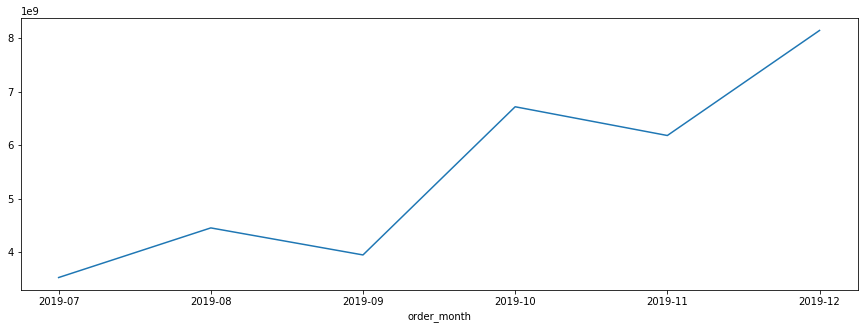

In [12]:
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

## **Menambahkan Title and Axis Labels**

Beberapa hal yang lazim dimodifikasi pada sebuah grafik adalah judul (title) dan label di sumbu-x & sumbu-y (axis labels).

 

Untuk menambahkannya, tinggal menambah plt.title, plt.xlabel, dan plt.ylabel di code sebelum plt.show(), misalnya seperti ini:

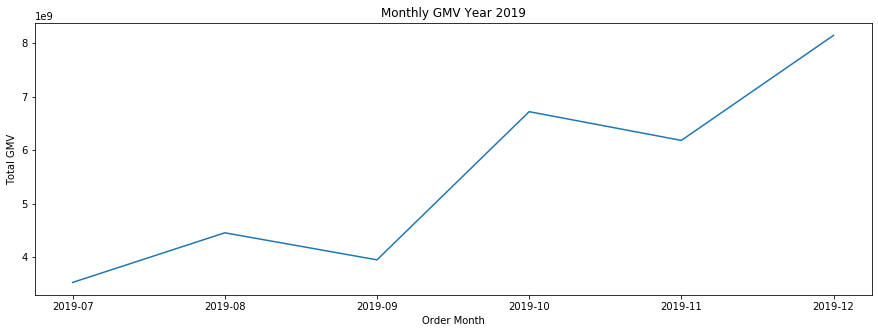

In [13]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

## **Kustomisasi Title and Axis Labels**

Berikut cara untuk memodifikasi judul/title, parameter yang bisa ditambahkan:

**loc**: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka defaultnya title ada di tengah.
**pad**: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
**fontsize**: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
**color**: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.
Untuk xlabel dan ylabel, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc.

 

Mari modifikasi **judul**, **xlabel**, dan **ylabel** dengan parameter-parameter di atas. Jika dieksekusi kode yang telah selesai dituliskan pada code editor dengan, maka diperoleh output grafik berupa:

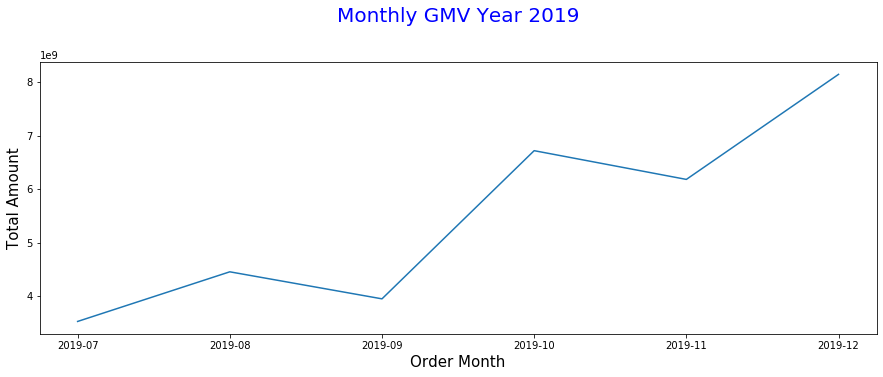

In [14]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

### **Kustomisasi Line dan Point**

Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:

- **color**: mengubah warnanya (sama seperti di title)
- **linewidth**: mengubah ketebalan line/garisnya (dalam satuan px)
- **linestyle**: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
- **marker**: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

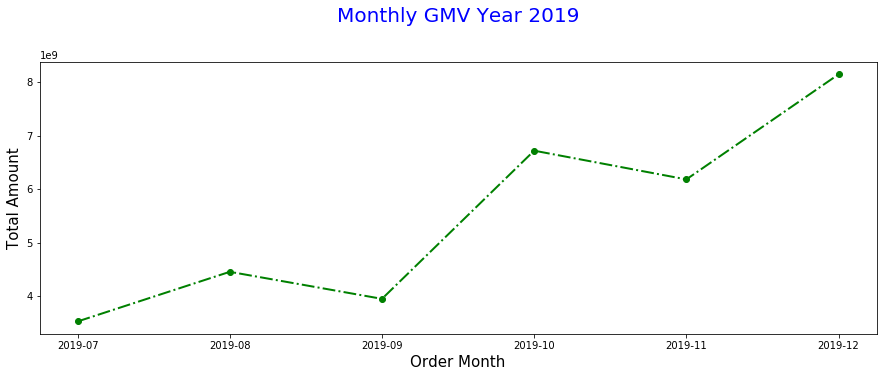

In [15]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue', )
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

In [16]:
dataset.groupby('order_month')['gmv'].sum().reset_index()

,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000
5,2019-12,8148235000


## **Kustomisasi Grid**

Selanjutnya mari melakukan kustomisasi grid. Grid berguna untuk mempermudah ketika menerjemahkan titik yang dipetakan. Caranya dengan menambahkan `plt.grid()` dengan parameter yang mirip dengan line.

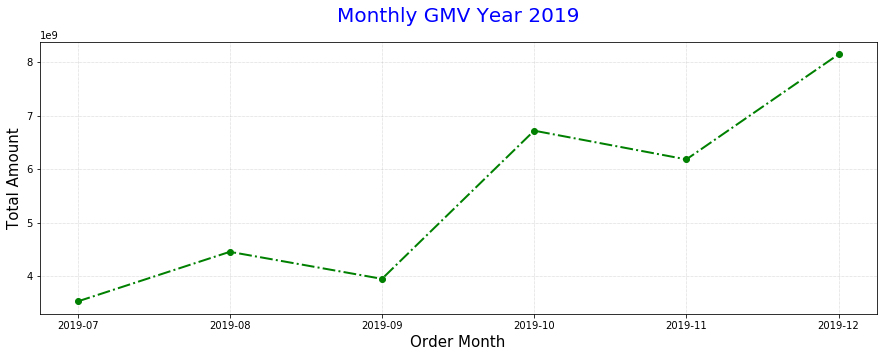

In [17]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()